# DRUG SELECTION MODEL

About the Model:-

In this model there are 5 diffrent drugs A,B,C,X and Y.

According to Age,Sex and medical conditions we have to predict which drug is suitable.

In [ ]:
# import all the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [4]:
# import the dataset

In [5]:
df = pd.read_csv("drug200.csv")
df.head()
    

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.shape


(200, 6)

In [9]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<AxesSubplot:xlabel='Age', ylabel='Density'>

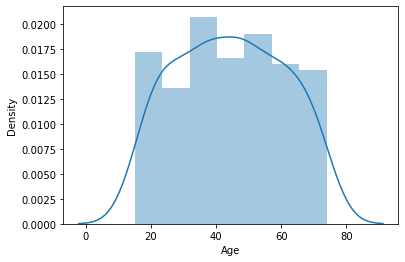

In [10]:
sns.distplot(df["Age"],kde= True)

<AxesSubplot:xlabel='Sex', ylabel='count'>

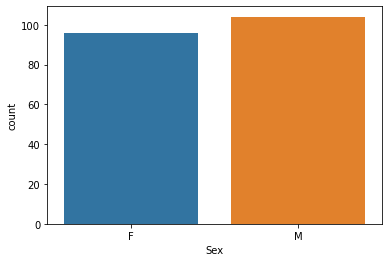

In [11]:
sns.countplot(x= "Sex",data= df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

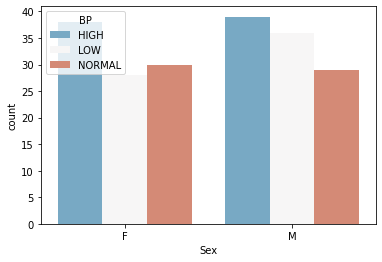

In [16]:
sns.countplot(x= "Sex",hue= "BP",data= df,palette= 'RdBu_r')

<AxesSubplot:xlabel='Sex', ylabel='count'>

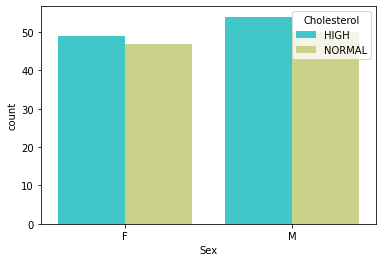

In [76]:
sns.countplot(x= "Sex",hue= "Cholesterol",data= df,palette= 'rainbow')

<AxesSubplot:xlabel='Na_to_K', ylabel='Age'>

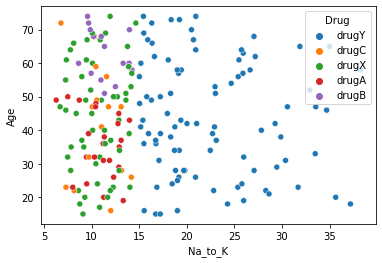

In [47]:
sns.scatterplot(data= df,x="Na_to_K",y="Age",hue= "Drug")

<AxesSubplot:xlabel='Sex', ylabel='count'>

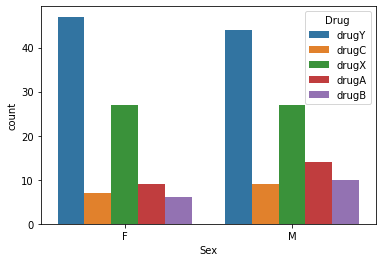

In [51]:
sns.countplot(data = df,x= "Sex" ,hue= "Drug")

<AxesSubplot:xlabel='BP', ylabel='count'>

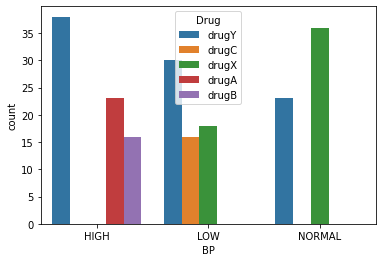

In [54]:
sns.countplot(data = df,x= "BP" ,hue= "Drug")

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

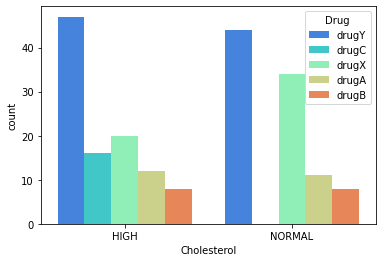

In [17]:
sns.countplot(data = df,x= "Cholesterol" ,hue= "Drug",palette= 'rainbow')

<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

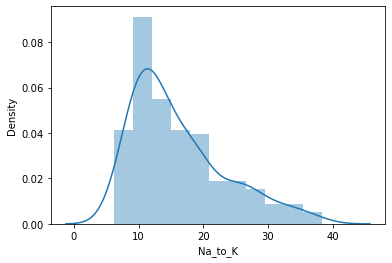

In [37]:
sns.distplot(df["Na_to_K"])

<AxesSubplot:>

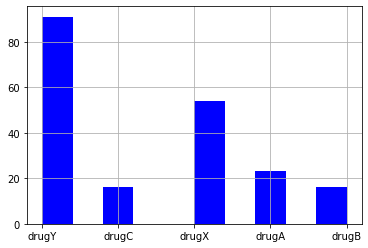

In [58]:
df["Drug"].hist(color="blue")

Separate X and Y

In [34]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

# Data Cleaning

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), ['Sex','BP','Cholesterol'])], remainder='passthrough')

x = np.array( ct.fit_transform(x))

# Train test split the model

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3)

# Model Building with Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

# Check the Accuracy of logreg Model

In [41]:
from sklearn.metrics import accuracy_score
print(f'accuracy_score:{accuracy_score(ytest,ypred)}')

accuracy_score:0.9166666666666666


In [42]:
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve 
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       drugA       0.80      0.80      0.80         5
       drugB       0.80      0.80      0.80         5
       drugC       1.00      0.67      0.80         6
       drugX       0.95      1.00      0.97        19
       drugY       0.92      0.96      0.94        25

    accuracy                           0.92        60
   macro avg       0.89      0.85      0.86        60
weighted avg       0.92      0.92      0.91        60



In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[ 5  0  0  0  0]
 [ 1  4  0  0  0]
 [ 0  0  4  0  1]
 [ 0  0  0 22  0]
 [ 0  0  0  1 22]]


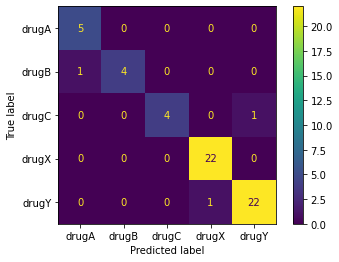

In [74]:
plot_confusion_matrix(logreg,xtest,ytest)

# Model Building with K-Nearest Neighbor

In [93]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(xtrain,ytrain)
ypredn = knn.predict(xtest)

# Check the Accuracy of knn Model

In [61]:
from sklearn.metrics import accuracy_score
print(f'Accuracy :- {accuracy_score(ytest,ypredn)}')

Accuracy :- 0.7166666666666667


In [72]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(knn,x,y,cv = 10,scoring = 'accuracy')
print (f"Avg Accuracy-: {cvs.mean()}")

Avg Accuracy-: 0.68


Conclusion:


Model made with Logistic Regression gives Accuracy of 91.66%

Model made with Classification(KNN) gives Accuracy of 71.66%

